In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(10)

## Step1. Generate the training data

In [2]:
sample_nums = 100
mean_value = 1.7
bias = 1
n_data = torch.ones(sample_nums, 2)
x0 = torch.normal(mean_value * n_data, 1) + bias      # class0 data shape=(100, 2)
y0 = torch.zeros(sample_nums)                         # class0 label shape=(100, 1)
x1 = torch.normal(-mean_value * n_data, 1) + bias     # class1 data shape=(100, 2)
y1 = torch.ones(sample_nums)                          # class1 label shape=(100, 1)
train_x = torch.cat((x0, x1), 0)
train_y = torch.cat((y0, y1), 0)

## Step2. Build the model

In [3]:
class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.features = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.features(x)
        x = self.sigmoid(x)
        return x


lr_net = LR()   # logistic regression model

## Step3. Choose the loss function

In [4]:
loss_fn = nn.BCELoss()

## Step4. Build the optimizer

In [5]:
lr = 0.01  # learning rate
optimizer = torch.optim.SGD(lr_net.parameters(), lr=lr, momentum=0.9)

## Step5. Tran the model with iteration

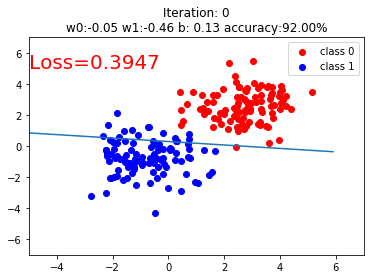

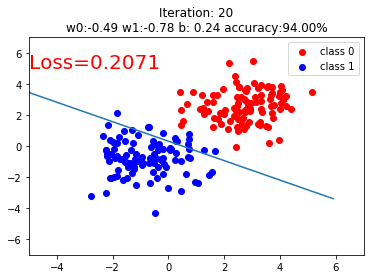

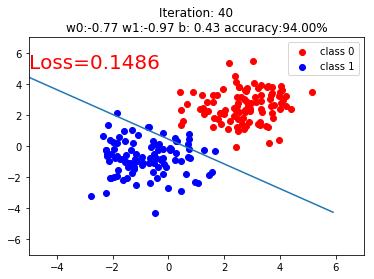

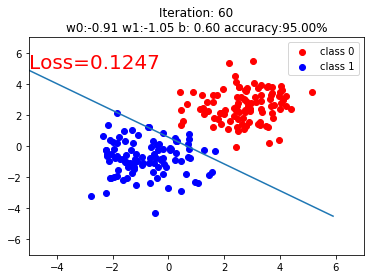

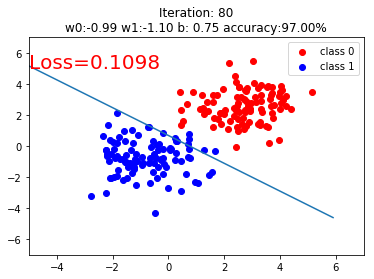

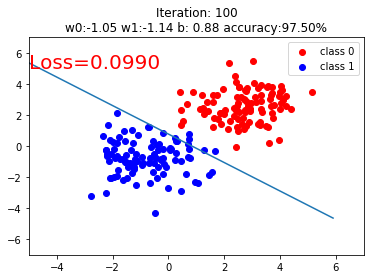

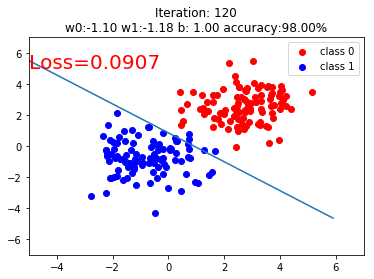

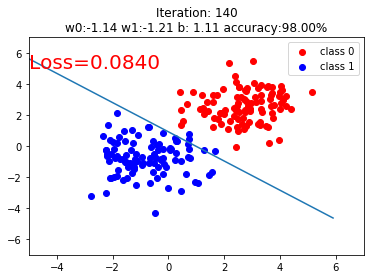

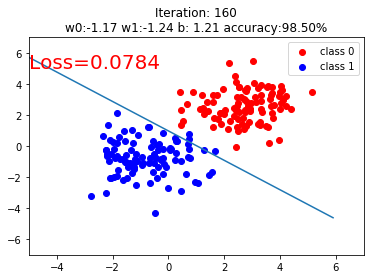

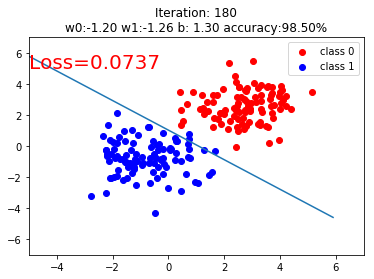

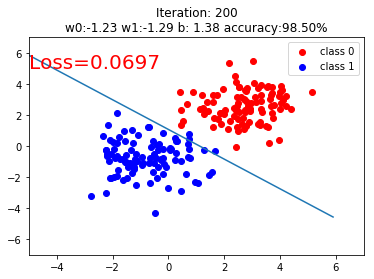

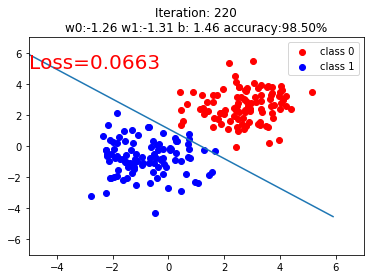

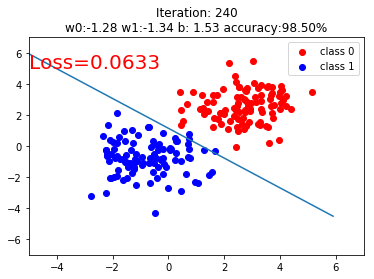

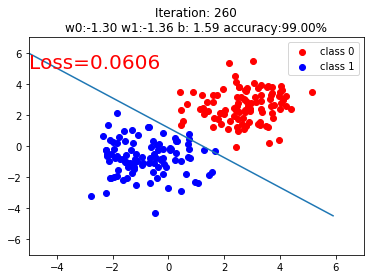

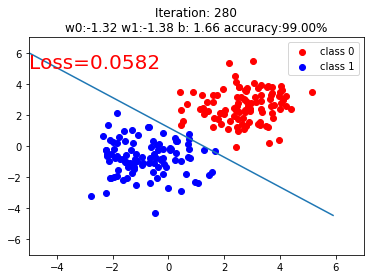

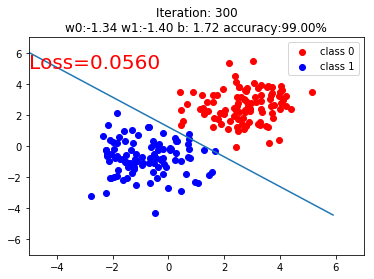

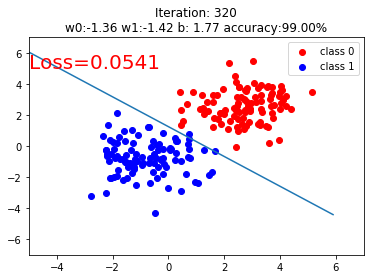

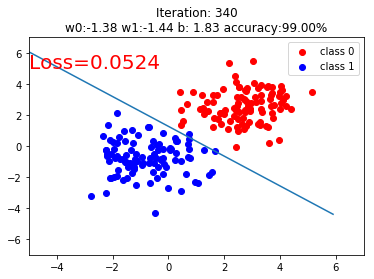

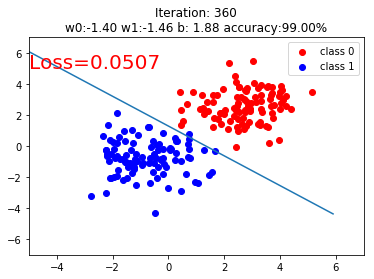

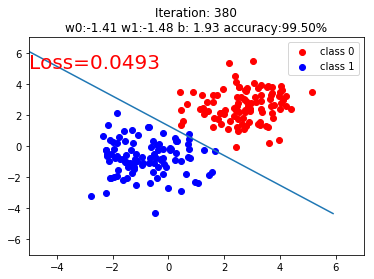

In [6]:
for iteration in range(1000):

    # forward
    y_pred = lr_net(train_x)

    # calculate loss
    loss = loss_fn(y_pred.squeeze(), train_y)

    # backward
    loss.backward()

    # update the perameter
    optimizer.step()

    # set the gradient to 0
    optimizer.zero_grad()

    # draw the graph
    if iteration % 20 == 0:

        mask = y_pred.ge(0.5).float().squeeze()  # classify the two type with threshold >0.5
        correct = (mask == train_y).sum()  # calcute the number of correct predicted results
        acc = correct.item() / train_y.size(0)  # calculate the accuracy

        plt.scatter(x0.data.numpy()[:, 0], x0.data.numpy()[:, 1], c='r', label='class 0')
        plt.scatter(x1.data.numpy()[:, 0], x1.data.numpy()[:, 1], c='b', label='class 1')

        w0, w1 = lr_net.features.weight[0]
        w0, w1 = float(w0.item()), float(w1.item())
        plot_b = float(lr_net.features.bias[0].item())
        plot_x = np.arange(-6, 6, 0.1)
        plot_y = (-w0 * plot_x - plot_b) / w1

        plt.xlim(-5, 7)
        plt.ylim(-7, 7)
        plt.plot(plot_x, plot_y)

        plt.text(-5, 5, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.title("Iteration: {}\nw0:{:.2f} w1:{:.2f} b: {:.2f} accuracy:{:.2%}".format(iteration, w0, w1, plot_b, acc))
        plt.legend()

        plt.show()
        # plt.pause(0.5)

        if acc > 0.99:
            break

Conclusion:
    
当mean为1的时候，训练迭代次数增加，两个类别样本点位置分布有很多重合，最后的精确率仅为91%

当mean为5的时候，训练迭代次数减少，两个类别样本点位置分布距离很远，最后的精确率为100%

当bias为5的时候，训练迭代次数增加，两个类别样本点位置分布距离有很多重合，最后的精确率为98.5%

当bias为0.5的时候，训练迭代次数减少，两个类别样本点位置分布距离很远，最后的精确率为99.5%